In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data/mouse_viral_study.csv')
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


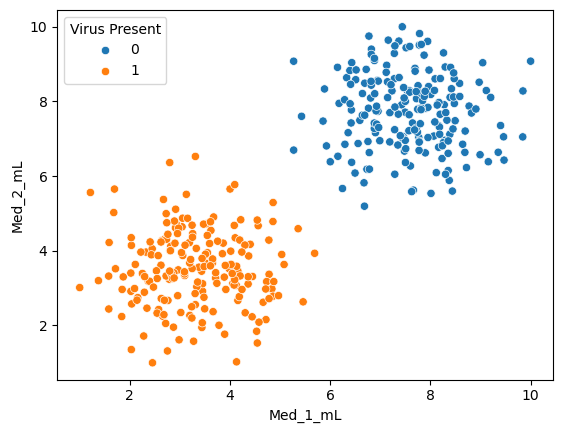

In [4]:
sns.scatterplot(data=df, x = 'Med_1_mL', y = 'Med_2_mL', hue = 'Virus Present');

In [5]:
from sklearn.svm import SVC

In [6]:
y = df['Virus Present']
X = df.drop('Virus Present', axis = 1)
print(X.shape, y.shape)

(400, 2) (400,)


In [7]:
model = SVC(kernel='linear', C = 1000)
model.fit(X, y)

SVC(C=1000, kernel='linear')

In [19]:
def run(model):
    plt.figure(figsize=(10, 8))
    # Plotting our two-features-space
    sns.scatterplot(x=df.iloc[:, 0], 
                    y=df.iloc[:, 1], 
                    hue=y, 
                    s=8);
    # Constructing a hyperplane using a formula.
    w = model.coef_[0]           # w consists of 2 elements
    b = model.intercept_[0]      # b consists of 1 element
    x_points = np.linspace(1, 10)    # generating x-points from -1 to 1
    y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
    # Plotting a red hyperplane
    plt.plot(x_points, y_points, c='r');
    # Encircle support vectors
    plt.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1], 
                s=50, 
                facecolors='none', 
                edgecolors='k', 
                alpha=.5);
    # Step 2 (unit-vector):
    w_hat = model.coef_[0] / (np.sqrt(np.sum(model.coef_[0] ** 2)))
    # Step 3 (margin):
    margin = 1 / np.sqrt(np.sum(model.coef_[0] ** 2))
    # Step 4 (calculate points of the margin lines):
    decision_boundary_points = np.array(list(zip(x_points, y_points)))
    points_of_line_above = decision_boundary_points + w_hat * margin
    points_of_line_below = decision_boundary_points - w_hat * margin
    # Plot margin lines
    # Blue margin line above
    plt.plot(points_of_line_above[:, 0], 
            points_of_line_above[:, 1], 
            'b--', 
            linewidth=2)
    # Green margin line below
    plt.plot(points_of_line_below[:, 0], 
            points_of_line_below[:, 1], 
            'g--',
            linewidth=2);

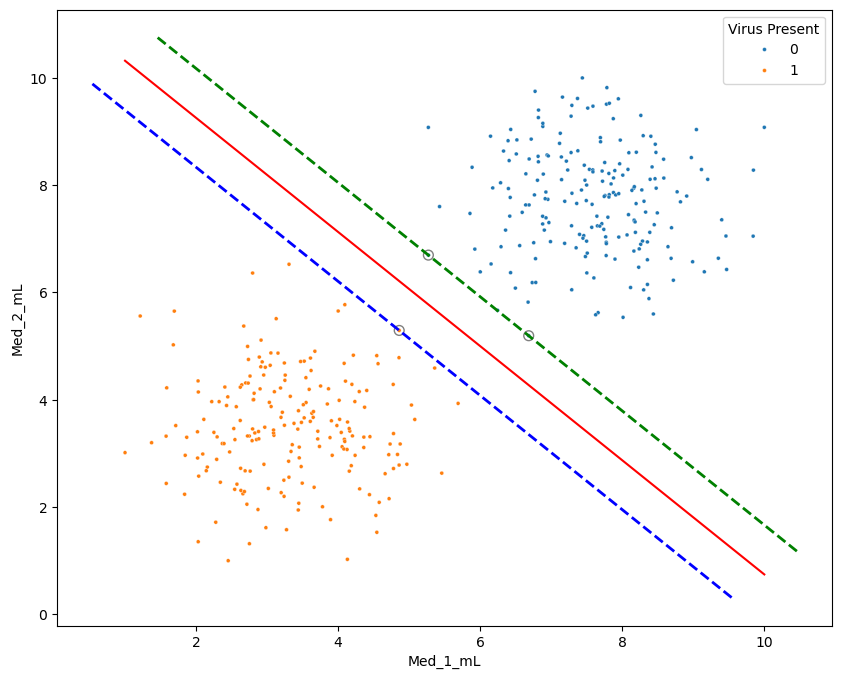

In [20]:
run(model)

In [24]:
from sklearn.model_selection import GridSearchCV
svm = SVC()
param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf']}
grid = GridSearchCV(svm,param_grid)

In [25]:
grid.fit(X, y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [26]:
grid.best_estimator_

SVC(C=0.01, kernel='linear')

In [27]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}